In [30]:
# Load R inside Python notebook
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [31]:
%%R
install.packages("readxl")
install.packages("tidyverse")
install.packages("skimr")
install.packages("psych")
install.packages("ggplot2")
install.packages("DataExplorer")
install.packages("rmarkdown", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readxl_1.4.5.tar.gz'
Content type 'application/x-gzip' length 1636512 bytes (1.6 MB)
downloaded 1.6 MB


The downloaded source packages are in
	‘/tmp/RtmppfMWN8/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/RtmppfMWN8/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/skimr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 1123025 bytes (1.1 MB)
downloaded 1.1 MB


The downloaded source packages are in
	‘/tmp/RtmppfMWN8/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as 

In [32]:
from google.colab import files
uploaded = files.upload()

Saving ILRR.xlsx to ILRR.xlsx
Saving RBP4.xlsx to RBP4.xlsx


New names:
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`

--- Cleaning Dataset 1 ---
tibble [50 × 8] (S3: tbl_df/tbl/data.frame)
 $ Numbering        : chr [1:50] "OP_date" "Initial OP" "age" "age35" ...
 $ patient numbering: chr [1:50] "date of first operation for primary breast cancer" "operation for primary breast cancer" "age" "age" ...
 $ ...3             : chr [1:50] NA "1: BCS" NA "0: age ≤ 35" ...
 $ ...4             : chr [1:50] NA "2: Mastectomy" NA "1: age > 35" ...
 $ ...5             : chr [1:50] NA NA NA NA ...
 $ ...6             : chr [1:50] NA NA NA NA ...
 $ ...7             : chr [1:50] NA NA NA NA ...
 $ ...8             : chr [1:50] NA NA NA NA ...

--- Cleaning Dataset 2 ---
tibble [400 × 18] (S3: tbl_df/tbl/data.frame)
 $ Group            : chr [1:400] "Case" "Case" "Case" "Case" ...
 $ Age              : num [1:400] 54 44 50 30 26 40 28 28 68 32 ...
 $ Miscarriage      : chr [1:400] "No" "No" "No" "No" ...
 $ Menopause 



processing file: report.rmd
output file: /content/report.knit.md


Output created: EDA_Report_1.html


processing file: report.rmd
output file: /content/report.knit.md


Output created: EDA_Report_2.html


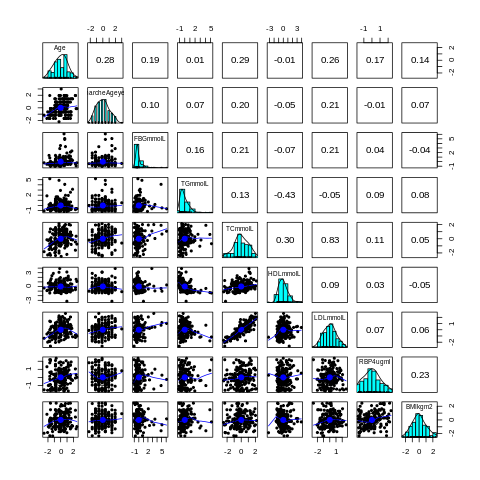

In [35]:
%%R
library(readxl)
library(tidyverse)
library(skimr)
library(psych)
library(DataExplorer)
library(ggplot2)
library(rmarkdown)

# Read both datasets
data1 <- read_excel("ILRR.xlsx")
data2 <- read_excel("RBP4.xlsx")

# Cleaning Dataset 1
cat("\n--- Cleaning Dataset 1 ---\n")
str(data1)
colSums(is.na(data1))
data1_clean <- na.omit(data1)
summary(data1_clean)

# Cleaning Dataset 2
cat("\n--- Cleaning Dataset 2 ---\n")
str(data2)
colSums(is.na(data2))
data2_clean <- na.omit(data2)
summary(data2_clean)

# Convert character to factor, scale numeric

# Dataset 1
data1_clean <- data1_clean %>%
  mutate(across(where(is.character), as.factor))
num_cols1 <- sapply(data1_clean, is.numeric)
data1_scaled <- data1_clean
if (sum(num_cols1) > 0) {
  data1_scaled[num_cols1] <- scale(data1_clean[num_cols1])
}


# Dataset 2
data2_clean <- data2_clean %>%
  mutate(across(where(is.character), as.factor))
num_cols2 <- sapply(data2_clean, is.numeric)
data2_scaled <- data2_clean
if (sum(num_cols2) > 0) {
  data2_scaled[num_cols2] <- scale(data2_clean[num_cols2])
}

# Dataset 1 Summary
cat("\n--- EDA for Dataset 1 ---\n")
skim(data1_scaled)
# pairs.panels(data1_scaled[, num_cols1]) # Removed as data1_scaled has no numeric columns
if (rmarkdown::pandoc_available()) {
  create_report(data1_scaled, output_file = "EDA_Report_1.html")
} else {
  cat("Pandoc not available, skipping EDA report for Dataset 1.\n")
}


# Dataset 2 Summary
cat("\n--- EDA for Dataset 2 ---\n")
skim(data2_scaled)
if (sum(num_cols2) > 0) {
  pairs.panels(data2_scaled[, num_cols2])
} else {
  cat("No numeric columns in Dataset 2 for pairs.panels plot.\n")
}

if (rmarkdown::pandoc_available()) {
  create_report(data2_scaled, output_file = "EDA_Report_2.html")
} else {
  cat("Pandoc not available, skipping EDA report for Dataset 2.\n")
}

In [34]:
from google.colab import files
files.download("EDA_Report_1.html")
files.download("EDA_Report_2.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>